# Шаг 1. Импорт данных и их предобработка!

In [1]:
import pandas as pd

flights_amount_data = pd.read_csv('/datasets/query_1.csv')

city_flights_data = pd.read_csv('/datasets/query_3.csv')


In [2]:
print(flights_amount_data.head(5))
for row in flights_amount_data.columns:
    print('Количество пропусков в столбце ', row, '=', flights_amount_data[row].isnull().sum())
print(flights_amount_data.info())    
print()
print()

print(city_flights_data.head(5))
for row in city_flights_data.columns:
    print('Количество пропусков в столбце ', row, '=', city_flights_data[row].isnull().sum())
print(city_flights_data.info())      
    

             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
3   Boeing 767-300             600
4   Boeing 777-300             300
Количество пропусков в столбце  model = 0
Количество пропусков в столбце  flights_amount = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None


          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613
Количество пропусков в столбце  city = 0
Количество пропусков в столбце  average_flights = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null floa

In [3]:
print(flights_amount_data.head(5))

city_flights_data.head(5)

             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
3   Boeing 767-300             600
4   Boeing 777-300             300


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


## Выводы:

На основании проверки данных можно сделать следующие выводы:
1. Пропусков в данных нет - они пригодны для дальнейшей работы.
2. Тип данных для каждого столбца приведен верно - изменения не требуется.
3. В DataFrame был столбец "Unnamed: 0" - его удаляем.

Таким образом, мы можем использовать эти данные для дальнейшей работы.

# Шаг 2. Оценка наиболее "популярных" городов!

In [4]:
city_flights_data = city_flights_data.sort_values(by = 'average_flights', ascending = False)
city_flights_data.head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


#### Выводы:

На основании полученных данных мы можем сделать вывод, что топ-10 городов по количеству рейсов в указанный период:
1. Москва
2. Санкт-Петербург
3. Новосибирск
4. Красноярск
5. Екатеринбург
6. Ростов-на-Дону
7. Пермь
8. Брянск
9. Сочи
10. Ульяновск

Тем не менее, следует обратить внимание на то, что лидером остается город Москва, так как количество рейсов в этот город превышает среднее число в 13 раз; для Санкт-Петербурга - в 3 раза.

# Шаг 3. Построение графиков.

## График: модель самолета и количество рейсов

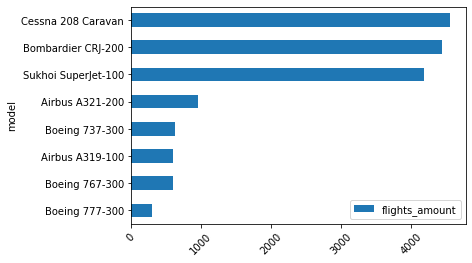

In [28]:
from matplotlib import pyplot as plt


ax = (flights_amount_data
      .sort_values(by = 'flights_amount', ascending = True)
      .plot.barh(x = 'model', y='flights_amount')
     )

ax.tick_params(axis='x', rotation=45)


# Вывод:

На основании полученных данных можно сделать вывод, что авиакомпании предпочитают использовать следующие модели самолетов:
1. Cessna 208 Caravan;
2. Bombardier CRJ-200;
3. SSJ-100;

## График: города и количество рейсов

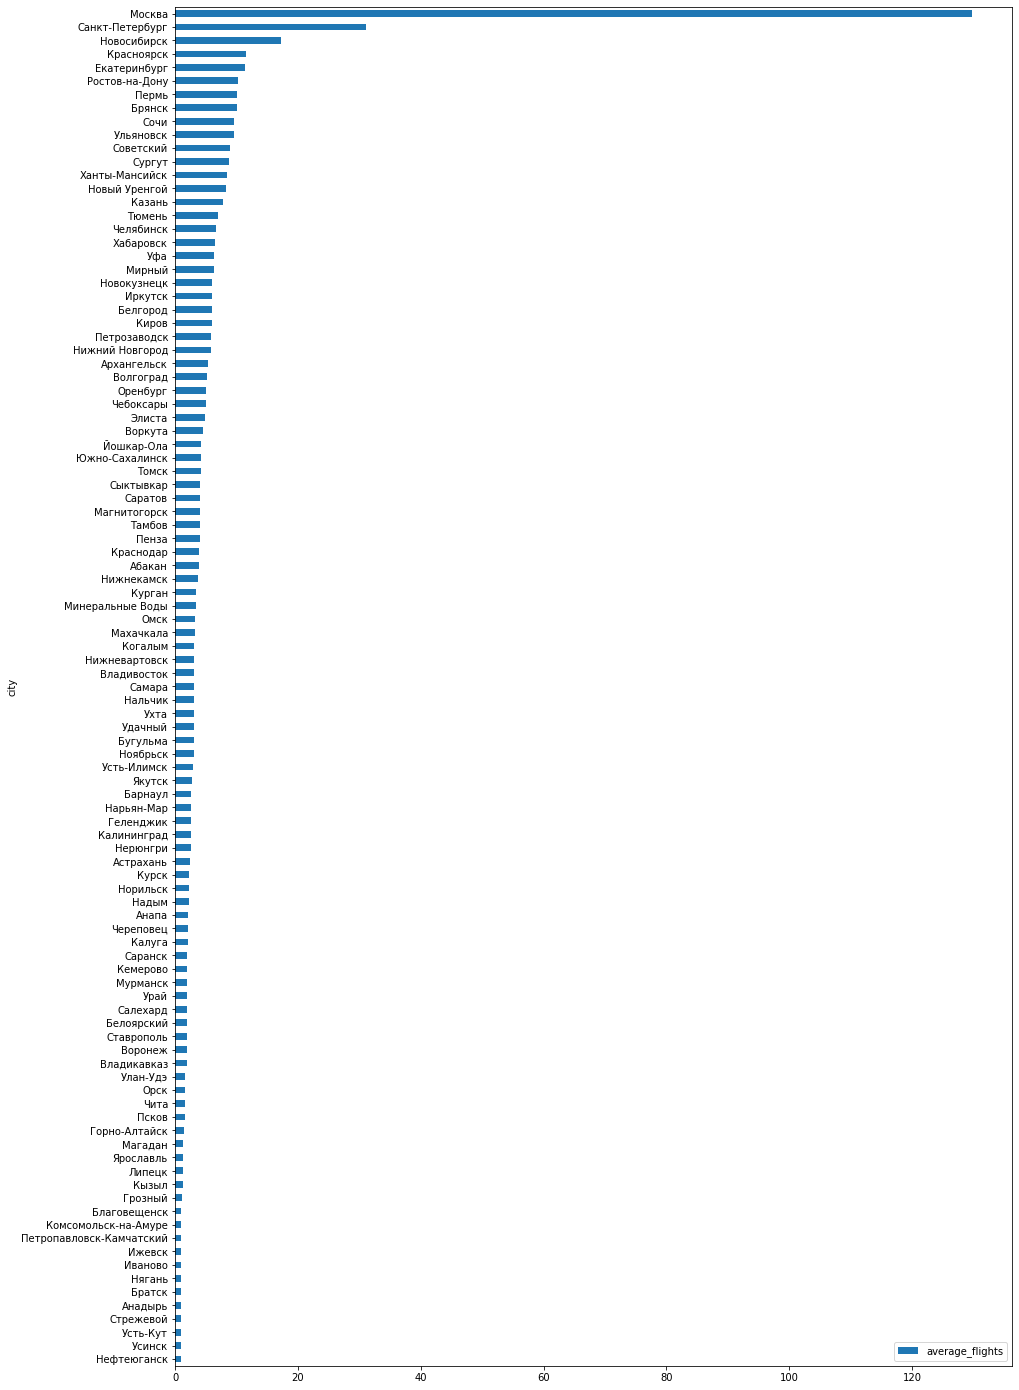

In [41]:
ax = (
     city_flights_data
      .sort_values(by = 'average_flights', ascending = True)
      .plot.barh(x = 'city', y='average_flights', figsize=(15, 25))
     )


# Вывод:

На основании построенного графика можно сделать вывод, что первые три места по количеству рейсов занимают Москва, Санкт-Петербург и Новосибирск. В прочие города, где проводятся фестивали, количество рейсов значительно меньше.

## График: топ-10 городов и количество рейсов

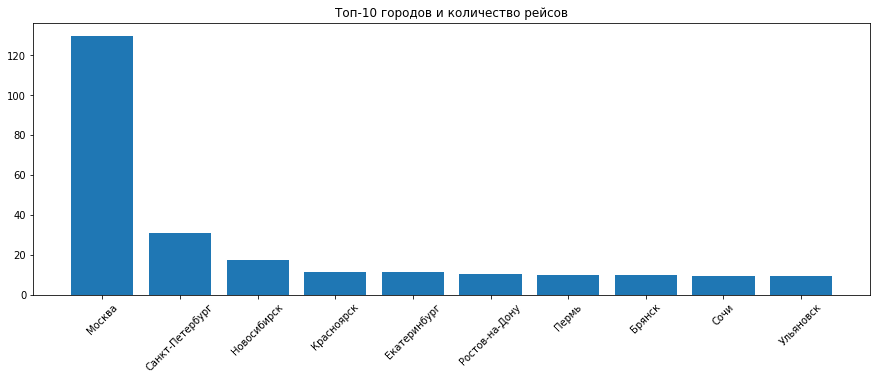

In [7]:
plt.subplots(figsize = (15, 5))
plt.title('Топ-10 городов и количество рейсов')
(plt
     .bar(data = city_flights_data
              .sort_values(by = 'average_flights', ascending = False).head(10),
          x = 'city', 
          height = 'average_flights')
)
plt.tick_params(axis='x', rotation=45, labelsize = '10')


### Вывод:

На основании полученных данных можно сделать вывод, что среди Топ-10 городов:
1. Лидером по количеству рейсов является Москва - в среднем 125 рейсов в день;
2. Второе место занимает Санкт-Петербург (30 рейсов в день), что в 4 раза меньше, чем у лидера;
3. В другие города в среднем совершается порядка 10 рейсов в день, что в 12 раз меньше, чем в Москву!

# Шаг 4. Проверка гипотезы

## Импортируем данные и проводим их предобработку

In [42]:
data = pd.read_csv('/datasets/query_last.csv')

print(data)
print()
print(data.info())

print()
print()

for row in data.columns:
    print('Количество пропусков в столбце ', row, '=', data[row].isnull().sum())

   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
2           32          51675            NaN           NaN
3           33          51378            NaN           NaN
4           34          51492            NaN           NaN
5           35          51360            NaN           NaN
6           36          51386           36.0       Видфест
7           37          51670            NaN           NaN
8           38          51518            NaN           NaN
9           39          51623            NaN           NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 400.0+ bytes
None


Количество пропусков в столбце  we

Несмотря на наличие пропусков, мы не будем производить их замену, так как подобное действие может привести к искажению результатов исследования. 

In [44]:
import numpy as np

data_festivals = data.query('festival_week.isnull() == False', engine = 'python')
data_not_festivals = data.query('festival_week.isnull() == True', engine = 'python')

print(len(data_festivals))
print(len(data_not_festivals))

print()


print('Дисперсия для data_festivals = ', np.var(data_festivals['ticket_amount']))
print('Дисперсия для data_not_festivals = ', np.var(data_not_festivals['ticket_amount']))

print()
print(data_festivals)
data_not_festivals



3
7

Дисперсия для data_festivals =  12998464.888888888
Дисперсия для data_not_festivals =  14694.408163265309

   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
6           36          51386           36.0       Видфест


,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Разделяем исходные данные на 2 DataFrame: когда проходит фестиваль и дни без фестиваля.


Начинаем проверку гипотезы: "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время"

### Формируем нулевую гипотезу:

### Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время!

В связи с малым количеством наблюдений (3 и 7 соответственно), в первую очередь нам необходимо проверить нормальность распределения. Для малого количества наблюдений мы будем использовать критерий Шапиро-Уилка.

In [45]:
from scipy.stats import shapiro
(
    shapiro(data_festivals['ticket_amount'])[1], shapiro(data_not_festivals['ticket_amount'])[1]
)

(0.07614270597696304, 0.29630061984062195)

Т.к. обе pvalue > 0.05, можно сказать, что для обеих выборок H0 (данные распределены нормально) не отвергается и мы можем использовать тест Стьюдента. Мы будем использовать проверку гипотезы о равенстве средних двух генеральных совокупностей.


In [47]:
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(data_festivals['ticket_amount'], data_not_festivals['ticket_amount'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


# Общий вывод:

Таким образом, мы можем сделать вывод, что средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время!